In [5]:
import pandas as pd
from tqdm.auto import tqdm
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop=stopwords.words('english')
from collections import defaultdict
from matplotlib import pyplot as plt   
import warnings
warnings.filterwarnings('ignore')
from adjustText import adjust_text

In [2]:
data_list=[]
for file in tqdm(os.listdir('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/twitter_all'), desc='Loading Twitter data'):
    if file.endswith('.csv'):
        name_file='rr-toxicity-rr-'+file
        data=pd.read_csv('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/revise_and_revision/rr_toxicity_twitter/'+name_file, usecols=['lower_username', 'tweet', 'toxicity'])
        data_list.append(data)

Loading Twitter data: 100%|██████████| 47/47 [00:02<00:00, 17.71it/s]


In [3]:
frame=pd.concat(data_list, axis=0, ignore_index=True)

In [4]:
frame.shape

(1558956, 3)

In [5]:
cross=pd.read_csv('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/revise_and_revision/ei_df.csv', index_col=0)

In [6]:
cross.sort_values(by=['degree_centrality'], ascending=False, inplace=True)

In [7]:
cross

,lower_username,platform,degree_centrality,size,ei_index
12,rockwonderland,red,0.448991,90798.145117,0.832321
13,maggiepeggy123,red,0.336607,68321.331151,0.737439
5,bonfiredesigns,red,0.212766,43553.191489,0.738462
6,ajcalmaga,red,0.109111,22822.149482,0.710000
2,triciabach,red,0.067103,14420.621931,0.691057
...,...,...,...,...,...
743,lilmama702011,blue,0.000546,1109.110747,1.000000
740,ali,red,0.000546,1109.110747,-1.000000
739,chrislhayes,blue,0.000546,1109.110747,1.000000
738,jjvlovelove,blue,0.000546,1109.110747,1.000000


In [8]:
from FightingWords.fighting_words_py3 import bayes_compare_language
from FightingWords.fighting_words_py3 import basic_sanitize

In [9]:
cross[cross['platform']=='red'][0:20]

,lower_username,platform,degree_centrality,size,ei_index
12,rockwonderland,red,0.448991,90798.145117,0.832321
13,maggiepeggy123,red,0.336607,68321.331151,0.737439
5,bonfiredesigns,red,0.212766,43553.191489,0.738462
6,ajcalmaga,red,0.109111,22822.149482,0.710000
2,triciabach,red,0.067103,14420.621931,0.691057
8,13thethe,red,0.031097,7219.312602,0.754386
9,icare4america16,red,0.023459,5691.762139,0.488372
11,kevin9359,red,0.021822,5364.429896,0.450000
4,bfraser747,red,0.020185,5037.097654,0.243243
1,rag_koko,red,0.019640,4927.986907,0.333333


In [10]:
cross[cross['platform']=='red'][20:40]

,lower_username,platform,degree_centrality,size,ei_index
547,genflynn,red,0.005456,2091.107474,-1.000000
86,gatewaypundit,red,0.004910,1981.996727,-1.000000
257,foxnews,red,0.004910,1981.996727,-1.000000
341,jennaellisesq,red,0.004910,1981.996727,-1.000000
160,oann,red,0.004364,1872.885979,-1.000000
172,newsmax,red,0.004364,1872.885979,-1.000000
0,bevbrook,red,0.003819,1763.775232,0.428571
640,briankempga,red,0.003819,1763.775232,-1.000000
25,donaldjtrumpjr,red,0.003819,1763.775232,-1.000000
61,seanhannity,red,0.003819,1763.775232,-1.000000


In [11]:
stop.append('https')
stop.append('rt')
stop.append('@')
stop.append('amp')

In [94]:
def lemmatization(dataframe:pd.DataFrame(), text:str):
    dataframe=dataframe[dataframe[text].notnull()]
    dataframe['tweet']=dataframe[text].str.lower()
    dataframe['no_mention']=dataframe['tweet'].str.replace(r'@.*\s','', regex=True)
    dataframe['no_hashtag']=dataframe['no_mention'].str.replace(r'#.*\s','', regex=True)
    dataframe['stopword']=dataframe['no_hashtag'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    dataframe['punct']=dataframe['stopword'].str.replace('[^\w\s]','')
    dataframe['punct_word']=dataframe['punct'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
    dataframe['lemma']=dataframe['punct_word'].apply(lambda row: ' '.join([w.lemma_ for w in nlp(row)]))
    dataframe['token']=dataframe['lemma'].apply(word_tokenize)
    return dataframe

In [54]:
top20=frame[frame['lower_username'].isin(cross[cross['platform']=='red'][0:20]['lower_username'])]
top40=frame[frame['lower_username'].isin(cross[cross['platform']=='red'][20:40]['lower_username'])]

In [55]:
top20_lemma=lemmatization(top20)
top40_lemma=lemmatization(top40)
print(top20.shape, top40.shape)

(44898, 10) (3765, 10)


In [56]:
top20_40=pd.concat([top20_lemma, top40_lemma], axis=0, ignore_index=True)

In [58]:
language=bayes_compare_language(top20['lemma'], top40['lemma'])

Vocab size is 1032
Comparing language...


In [59]:
language_z_df=pd.DataFrame(language, columns=['token', 'z-score'])

In [62]:
language_words=word_tokenize(' '.join(top20_40['lemma']))

In [63]:
frequency_language=defaultdict(int)
for word in language_words:
    frequency_language[word]+=1

In [64]:
frequency_list=[]
for word in frequency_language.keys():
    frequency_list.append([word, frequency_language[word]])

In [65]:
lang_freq_df=pd.DataFrame(frequency_list, columns=['token', 'frequency'])

In [66]:
viz_df=pd.merge(lang_freq_df, language_z_df, on='token').sort_values(by=['z-score'], ascending=False)
viz_df['freq_ratio']=viz_df['frequency']/viz_df['frequency'].sum()

In [67]:
os.getcwd()

'/Users/mstudio/repository/cross-platform'

In [71]:
viz_df.to_csv('z-score-twitter.csv')

In [2]:
viz_df=pd.read_csv('z-score-twitter.csv', index_col=0)

In [4]:
color_mapping = {
'joe': 'red',
'biden': 'red',
'irregularity': 'red',
'help': 'red',
'stop': 'red',
'report': 'red',
'tell': 'red',
'datum': 'red',
'fact': 'red',
'lie': 'red',
'believe': 'red',
'rig': 'red',
'criminal': 'red',
'federal': 'red',
'probe': 'red',
'investigation': 'red',
'nevada': 'red',
'pennsylvania': 'red'
}
viz_df['color'] = viz_df['token'].map(color_mapping).fillna('skyblue')


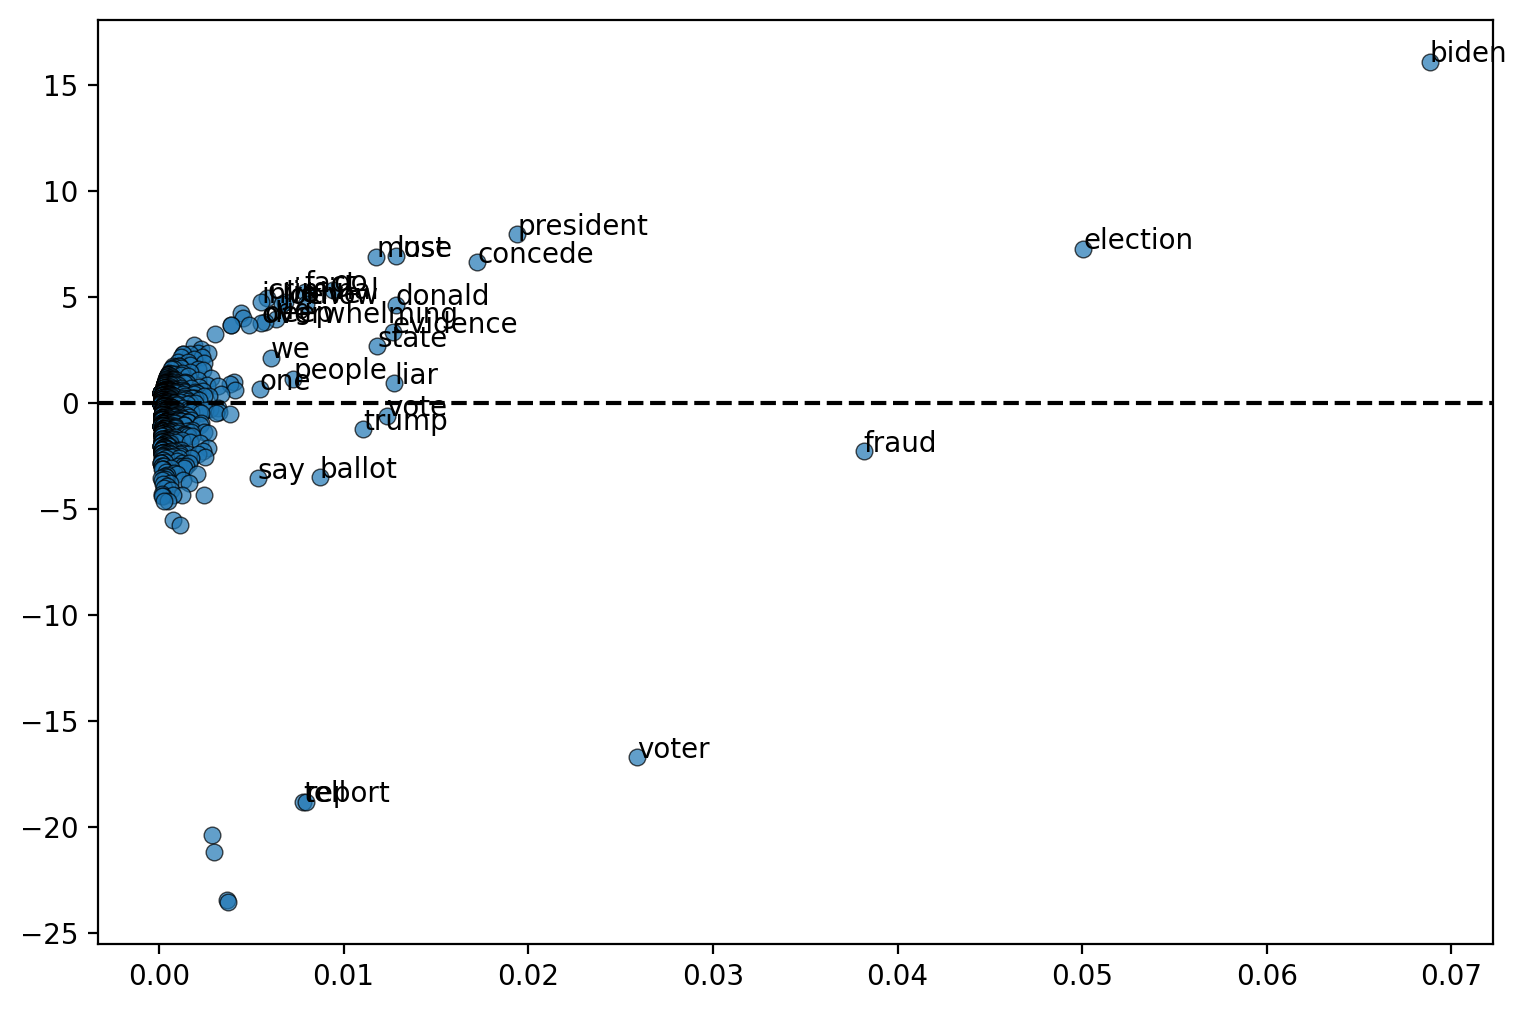

In [69]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
plt.scatter(y=viz_df['z-score'], x=viz_df['freq_ratio'], 
           alpha=0.7, #s=abs(slave_viz_red['z-score'])*20,
            marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')
for idx, row in viz_df.iterrows():
    if row['freq_ratio']>0.005:
        ax.annotate(row['token'], (row['freq_ratio'], row['z-score']))

(0.0, 0.006)

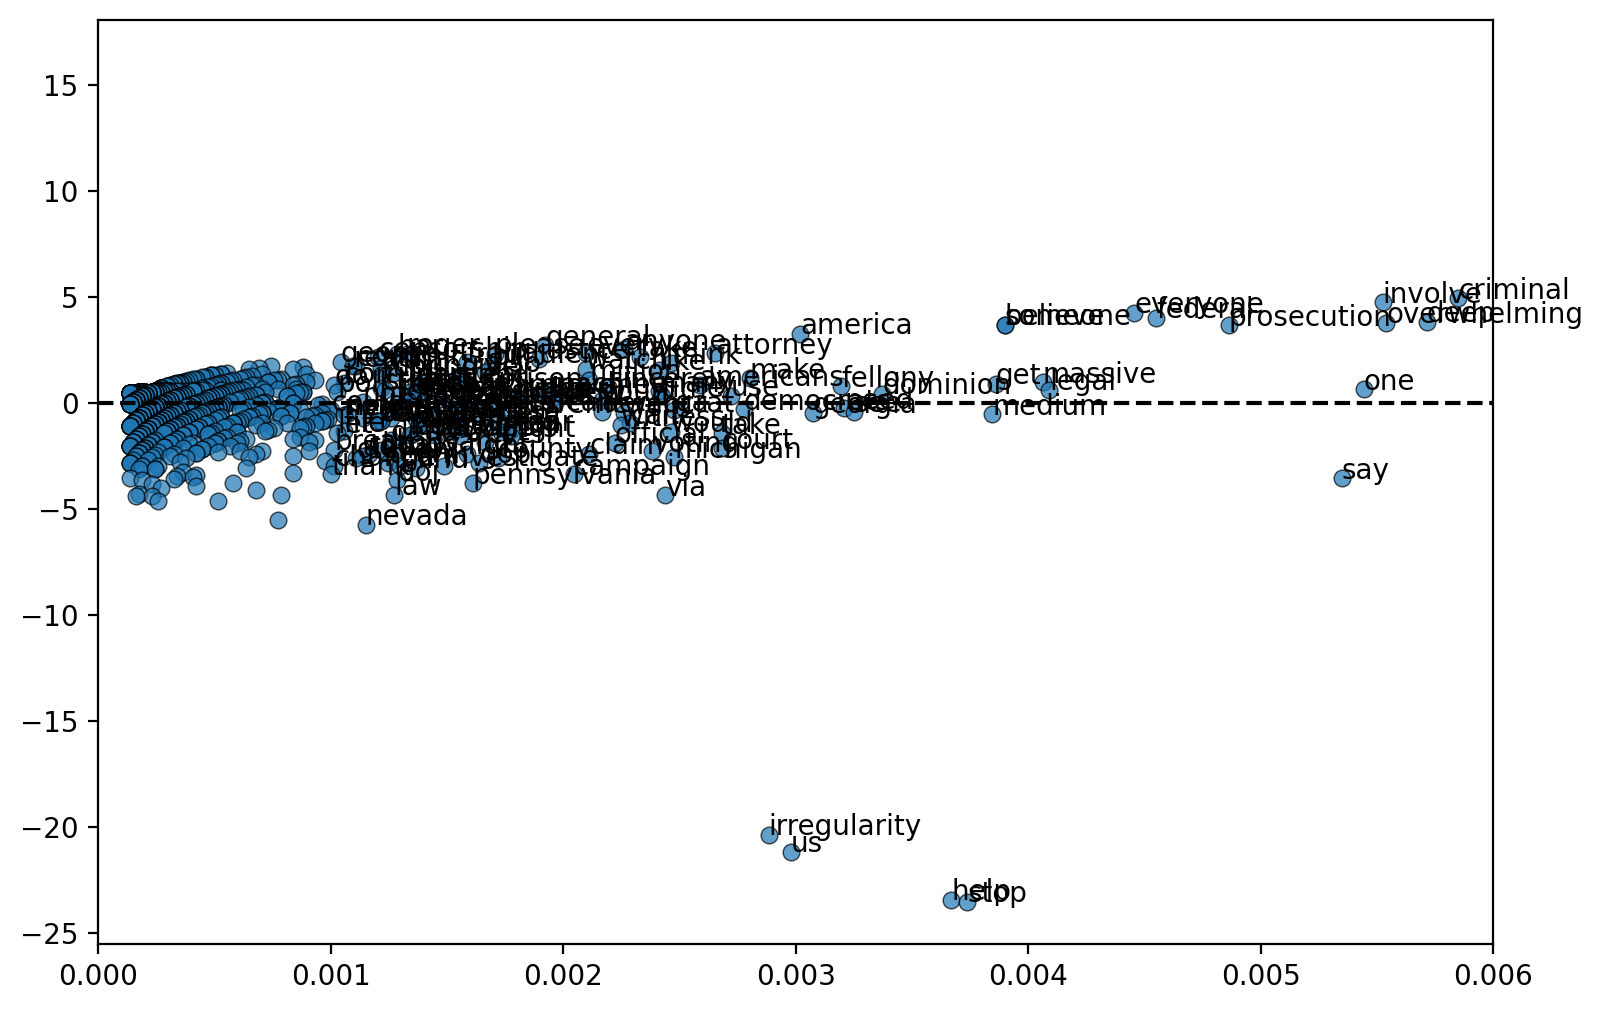

In [70]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
plt.scatter(y=viz_df['z-score'], x=viz_df['freq_ratio'], 
           alpha=0.7, #s=abs(slave_viz_red['z-score'])*20,
            marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')
for idx, row in viz_df.iterrows():
    if row['freq_ratio']>0.001:
        ax.annotate(row['token'], (row['freq_ratio'], row['z-score']))
plt.xlim(0, 0.006)

comparing between Twitter and Parler

In [74]:
parler_list=[]
for file in tqdm(os.listdir('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/parler_all'), desc='Loading Parler data'):
    if file.endswith('.csv'):
        name_file='rr-toxicity-rr-'+file
        data=pd.read_csv('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/revise_and_revision/rr_toxicity_parler/'+name_file, usecols=['lower_username', 'body', 'toxicity'])
        parler_list.append(data)

Loading Parler data: 100%|██████████| 47/47 [00:00<00:00, 134.25it/s]


In [75]:
parler=pd.concat(parler_list, axis=0, ignore_index=True)

In [78]:
match_user=pd.read_csv('/Users/mstudio/Library/CloudStorage/Box-Box/us_election_2020/Jay-toxicity/parallel-results/parallel-results-mac.csv', header=None)
match_user.columns=['twitter', 'parler']

In [90]:
subset=frame[frame['lower_username'].isin(match_user['twitter'].unique())]
subset.shape

(1558956, 3)

In [96]:
subset_twitter=lemmatization(subset, 'tweet')

In [97]:
subset=parler[parler['lower_username'].isin(match_user['parler'].unique())]
subset.shape

(107280, 3)

In [98]:
subset_parler=lemmatization(subset, 'body')

In [101]:
entire_subset=pd.concat([subset_twitter, subset_parler], axis=0, ignore_index=True)

In [99]:
comparison=bayes_compare_language(subset_twitter['lemma'], subset_parler['lemma'])

Vocab size is 9114
Comparing language...


In [81]:
len(match_user['twitter'].unique())

38798

In [100]:
comparison_z_df=pd.DataFrame(language, columns=['token', 'z-score'])

In [102]:
comparison_language_words=word_tokenize(' '.join(entire_subset['lemma']))

In [103]:
comparison_frequency_language=defaultdict(int)
for word in comparison_language_words:
    comparison_frequency_language[word]+=1

In [104]:
comparison_frequency_list=[]
for word in comparison_frequency_language.keys():
    comparison_frequency_list.append([word, comparison_frequency_language[word]])

In [105]:
comparison_lang_freq_df=pd.DataFrame(comparison_frequency_list, columns=['token', 'frequency'])

In [106]:
comparison_viz_df=pd.merge(comparison_lang_freq_df, comparison_z_df, on='token').sort_values(by=['z-score'], ascending=False)
comparison_viz_df['freq_ratio']=comparison_viz_df['frequency']/comparison_viz_df['frequency'].sum()

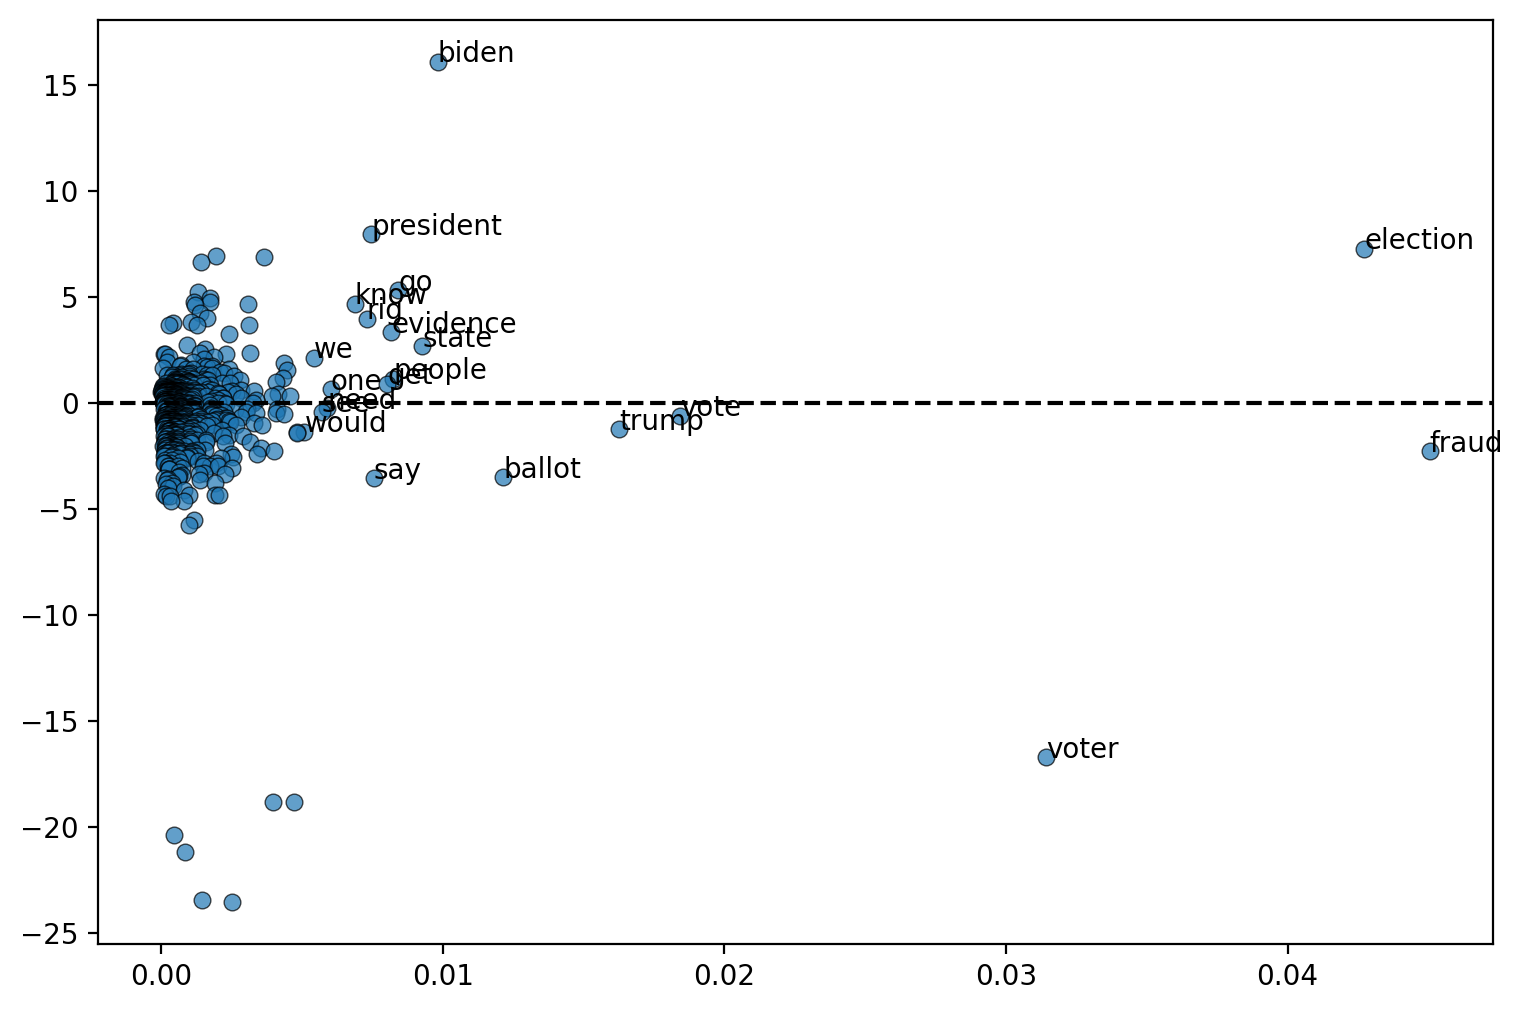

In [107]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
plt.scatter(y=comparison_viz_df['z-score'], x=comparison_viz_df['freq_ratio'], 
           alpha=0.7, #s=abs(slave_viz_red['z-score'])*20,
            marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')
for idx, row in comparison_viz_df.iterrows():
    if row['freq_ratio']>0.005:
        ax.annotate(row['token'], (row['freq_ratio'], row['z-score']))

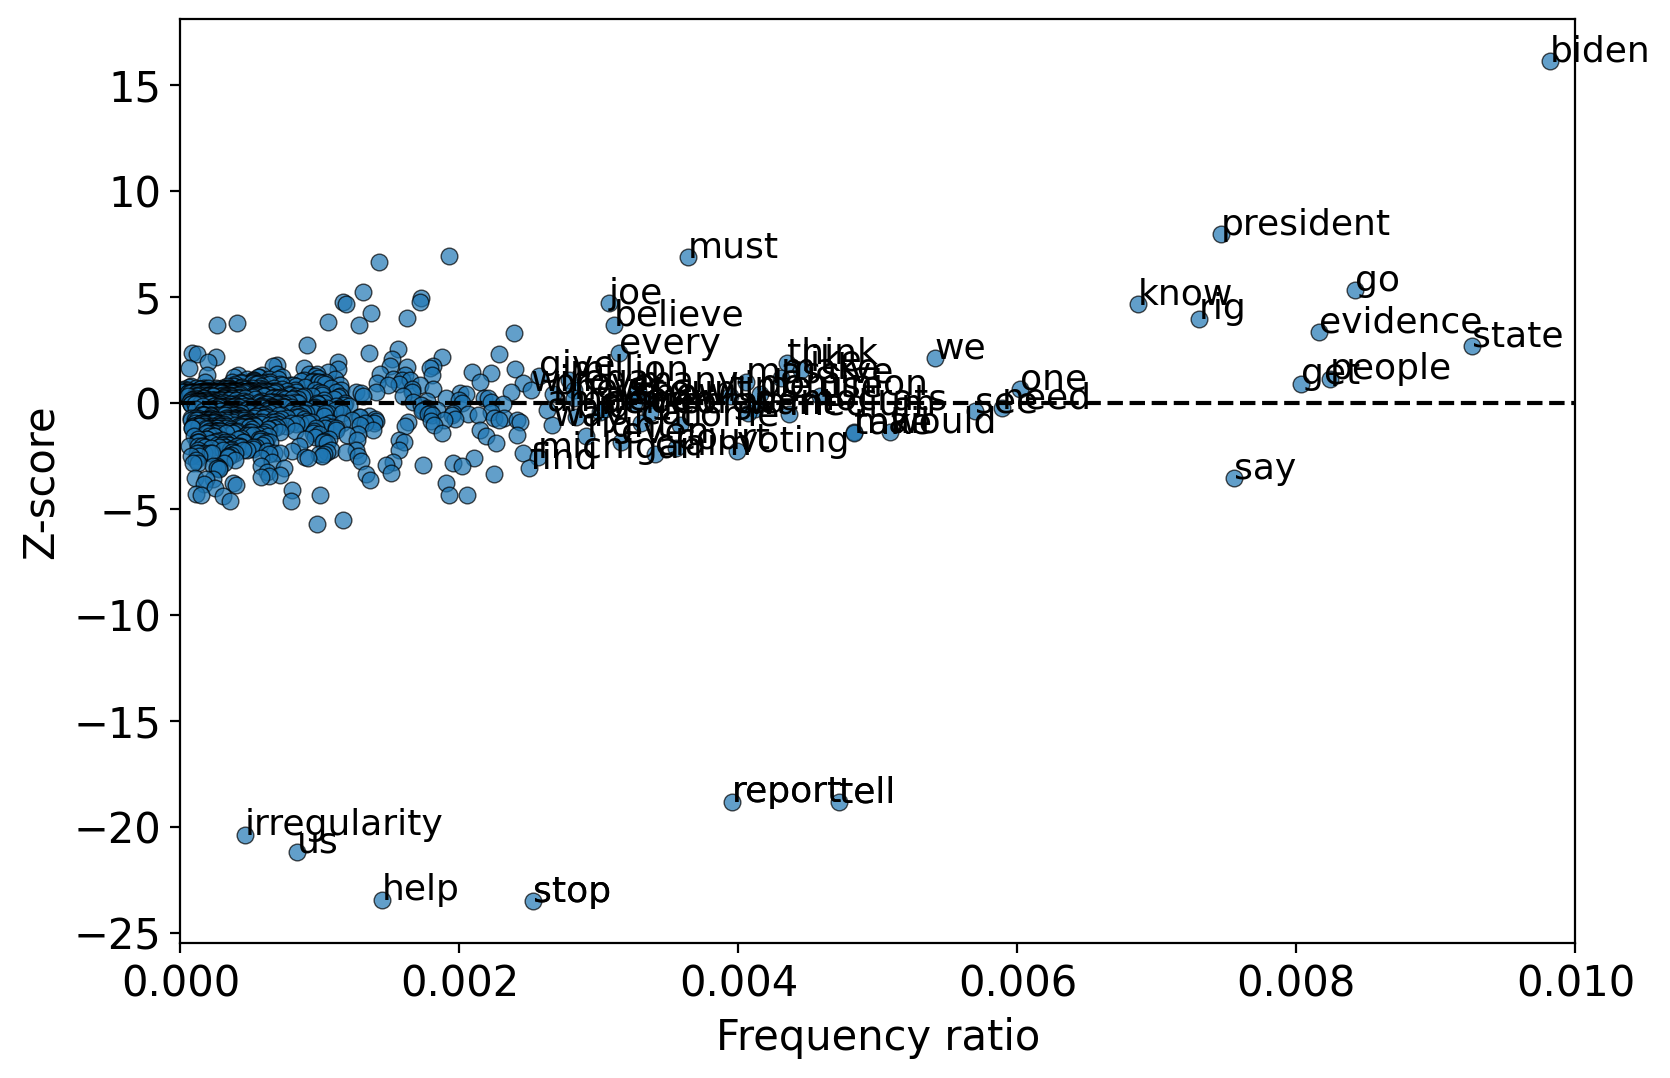

In [124]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
plt.scatter(y=comparison_viz_df['z-score'], x=comparison_viz_df['freq_ratio'], 
           alpha=0.7, #s=abs(slave_viz_red['z-score'])*20,
            marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')
for idx, row in comparison_viz_df.iterrows():
    if row['freq_ratio']>0.0025:
        ax.annotate(row['token'], (row['freq_ratio'], row['z-score']), fontsize=13)
    if row['z-score']<-15:
        ax.annotate(row['token'], (row['freq_ratio'], row['z-score']), fontsize=13)
plt.xlim(0, 0.01)
plt.xlabel('Frequency ratio', fontsize=15)
plt.ylabel('Z-score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('sage_latex_template_4/figure/RQ4rr-parler-twitter-comparison.pdf', bbox_inches='tight', dpi=500)
plt.show()

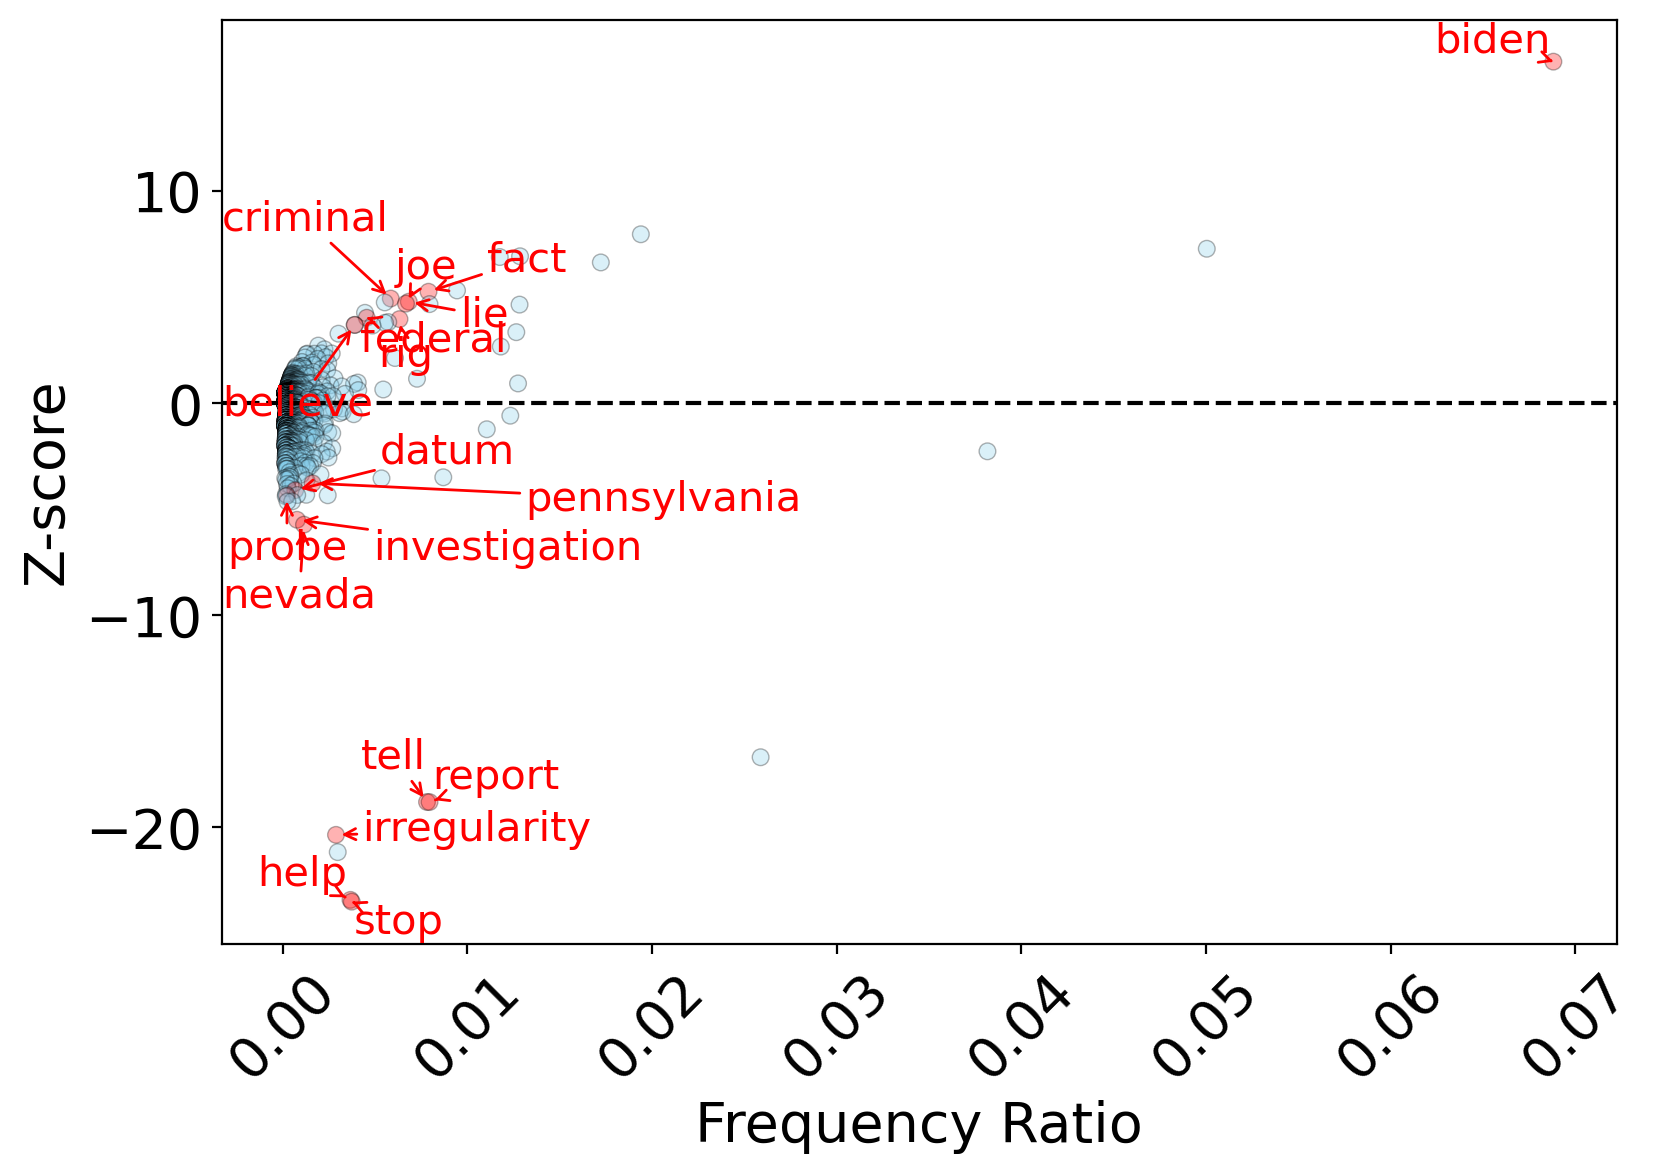

In [7]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
scatter = plt.scatter(y=viz_df['z-score'], x=viz_df['freq_ratio'], 
           alpha=0.3, color=viz_df['color'],
           marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')

# List of tokens to annotate and their corresponding colors
tokens_to_annotate = color_mapping

annotations = []
for idx, row in viz_df.iterrows():
    token = row['token']
    if token in tokens_to_annotate:
        color = tokens_to_annotate[token]
        annotation = ax.annotate(token, (row['freq_ratio'], row['z-score']), color=color, fontsize=15)
        annotations.append(annotation)

# Use adjust_text to prevent label overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

plt.xticks(rotation=45)
ax.tick_params(axis='both', which='both', labelsize=20)  # Increase tick label font size

plt.xlabel('Frequency Ratio', fontsize=20)
plt.ylabel('Z-score', fontsize=20)


# Save the plot to a file (e.g., PDF)
# plt.savefig('eacl2023_latex/figure/' + 'z-score-token-union-confederate.pdf', bbox_inches='tight', dpi=200)
plt.savefig('sage_latex_template_4/figure/RQ4rr-parler-twitter-comparison-new.pdf', bbox_inches='tight', dpi=500)

plt.show()


In [109]:
comparison_viz_df.to_csv('z-score-comparison.csv')